In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/ECE 143 Group 18 Project/NASA_planetary_data.csv', skiprows=168)

In [ ]:
df.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_tmag,sy_tmag_reflink,sy_kepmag,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,3.83790,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,3.82294,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,4.32140,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,5.86310,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,5.62810,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,6.095,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0


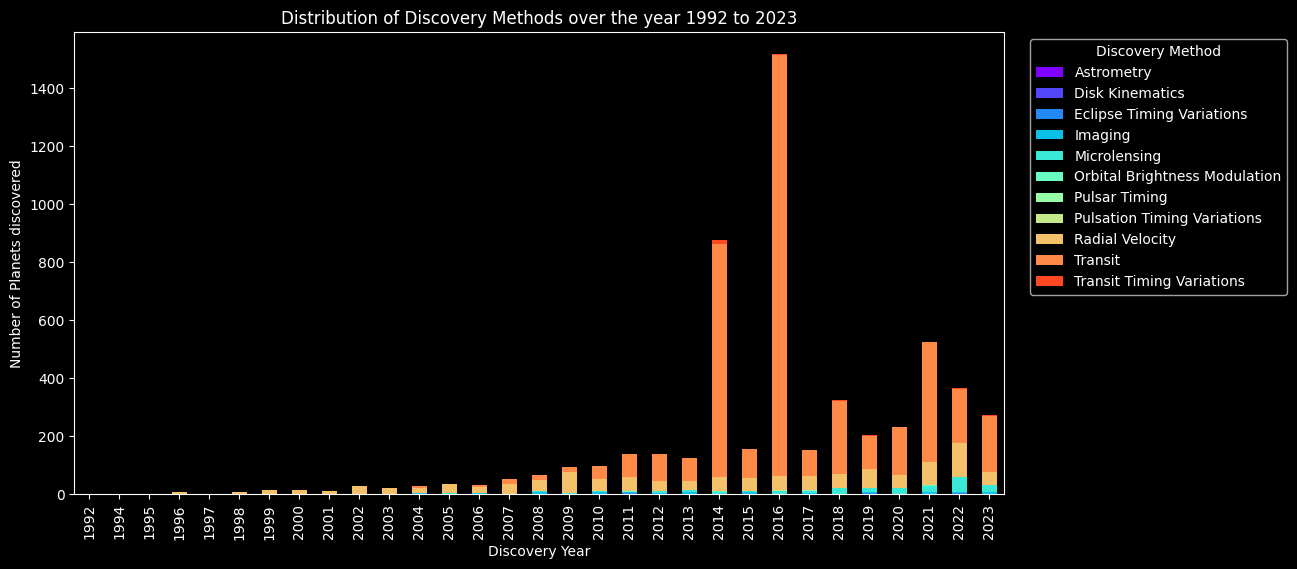

In [8]:
#Discovery Methods in bar chart

plt.style.use('dark_background')

# group discovery year and method as one data
group1 = df.groupby(['disc_year', 'discoverymethod']).size().unstack()

#list with colors for
colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group1.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

#labels, title and legend
plt.xlabel('Discovery Year')
plt.ylabel('Number of Planets discovered')
plt.title('Distribution of Discovery Methods over the year 1992 to 2023')
plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')

#show
plt.show()

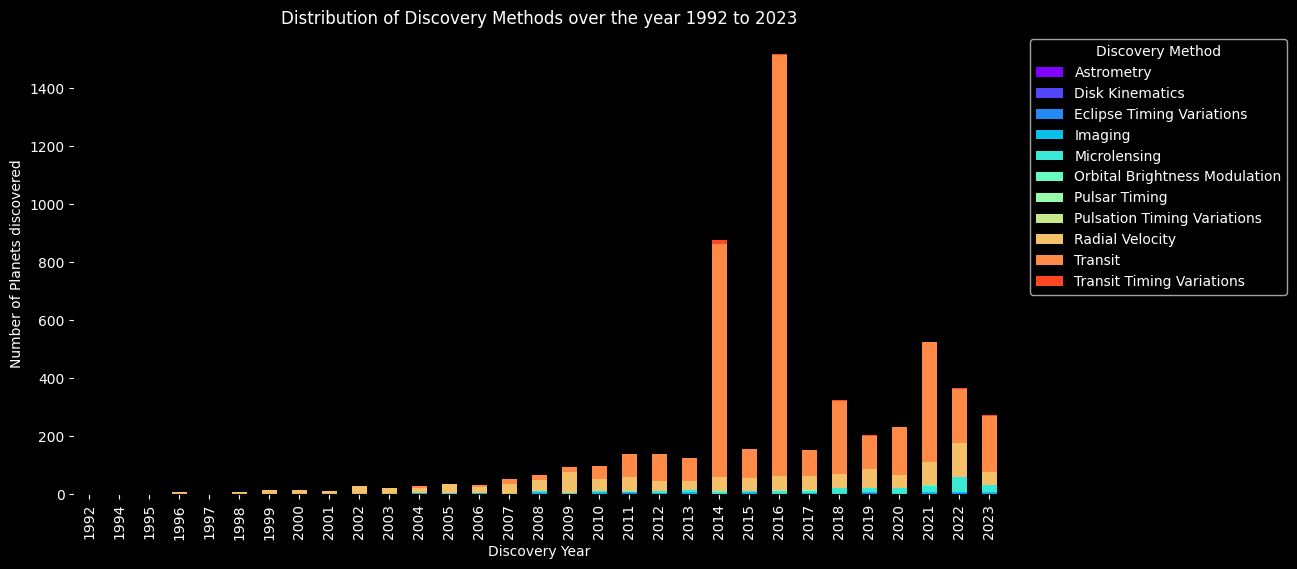

In [12]:
#Discovery Methods in bar chart

# group discovery year and method as one data
group1 = df.groupby(['disc_year', 'discoverymethod']).size().unstack()

#list with colors for
colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#background color is black
fig, ax=plt.subplots(figsize=(12, 6), facecolor='k')

#plot bar chart
ax = group1.plot(kind='bar', stacked=True, ax=ax, color=colors)

#labels, title and legend
plt.xlabel('Discovery Year', color='white')
plt.ylabel('Number of Planets discovered', color='white')
plt.title('Distribution of Discovery Methods over the year 1992 to 2023', color='white')
legend = ax.legend(title='Discovery Method', bbox_to_anchor=(1.02, 1), loc='upper left', facecolor='black')
legend.get_title().set_color('white')
for text in legend.get_texts():
    text.set_color('white')

# set tick color to white
ax.tick_params(axis='both', colors='white')

# fill the background inside bars with black
ax.set_facecolor('black')

#show
plt.show()

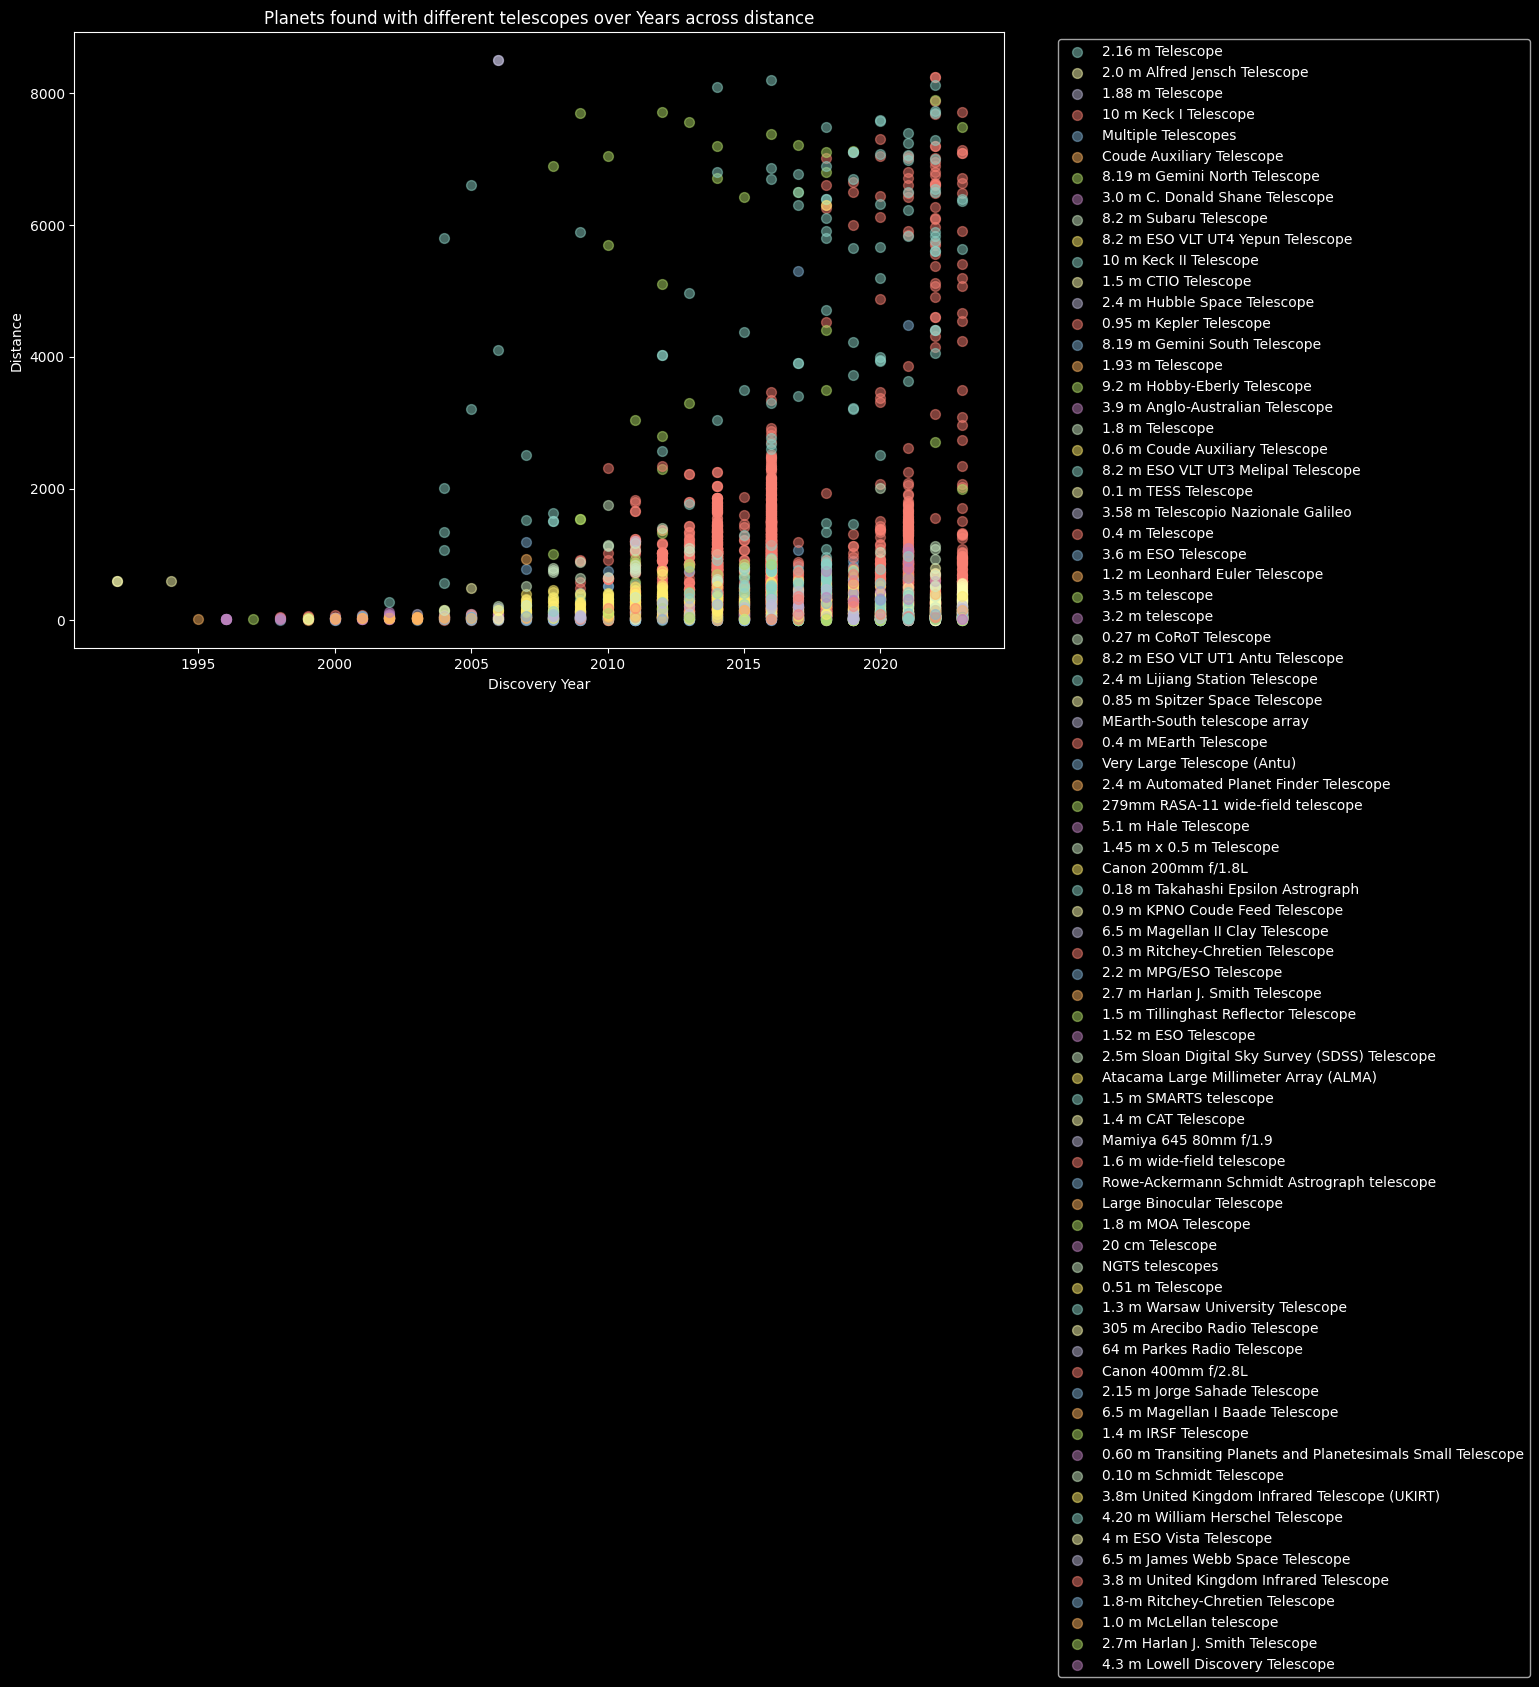

In [17]:
plt.style.use('dark_background')

#Scatter plot for all telescope (how do we even do that?)
plt.figure(figsize=(12, 8))
for telescope in df['disc_telescope'].unique():
  subset = df[df['disc_telescope']==telescope]
  plt.scatter(subset['disc_year'], subset['sy_dist'], label=telescope, s=50, alpha=0.5)

#labels, title and legend
plt.xlabel('Discovery Year')
plt.ylabel('Distance')
plt.title('Planets found with different telescopes over Years across distance')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()

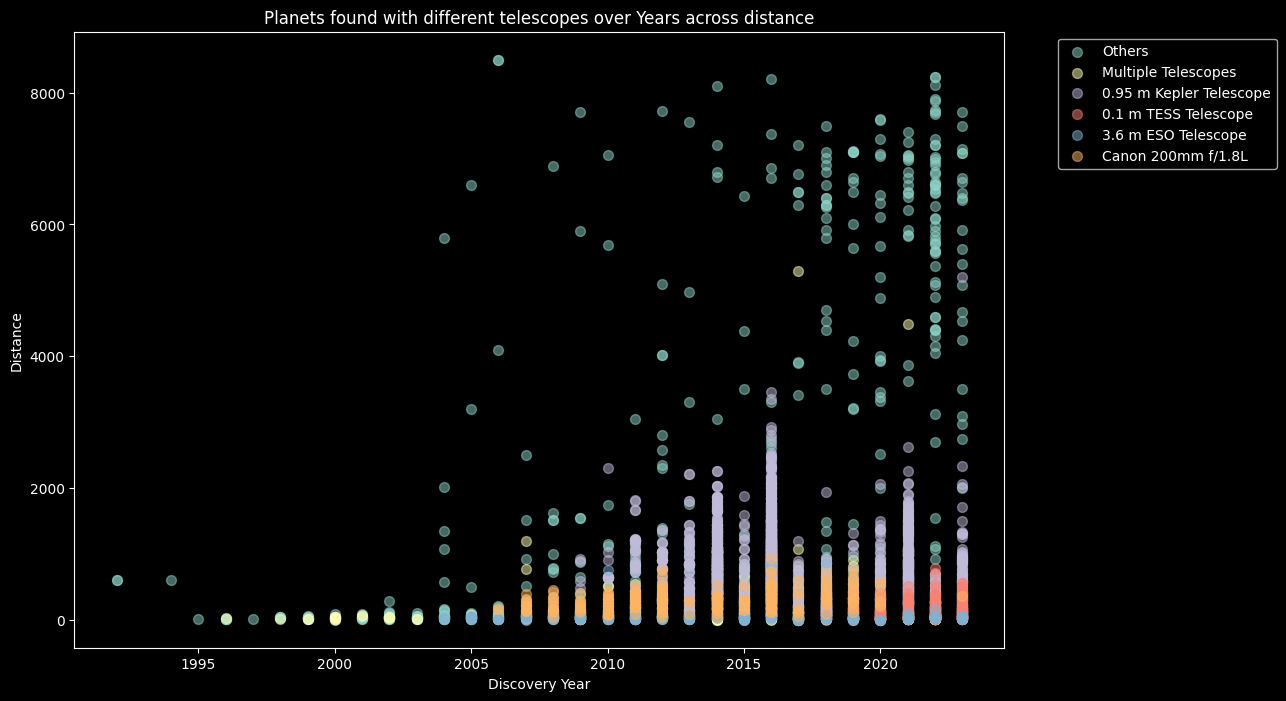

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Count the occurrences of each telescope
telescope_counts = df['disc_telescope'].value_counts()

# Select the top 5 telescopes, and group the rest into 'Others'
top5_telescopes = telescope_counts.head(5).index
df['disc_telescope_top5'] = df['disc_telescope'].apply(lambda x: x if x in top5_telescopes else 'Others')

plt.figure(figsize=(12, 8))

# Iterate over top 5 telescopes and 'Others'
for telescope in df['disc_telescope_top5'].unique():
    subset = df[df['disc_telescope_top5'] == telescope]
    plt.scatter(subset['disc_year'], subset['sy_dist'], label=telescope, s=50, alpha=0.5)

# Labels, title, and legend
plt.xlabel('Discovery Year')
plt.ylabel('Distance')
plt.title('Planets found with different telescopes over Years across distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

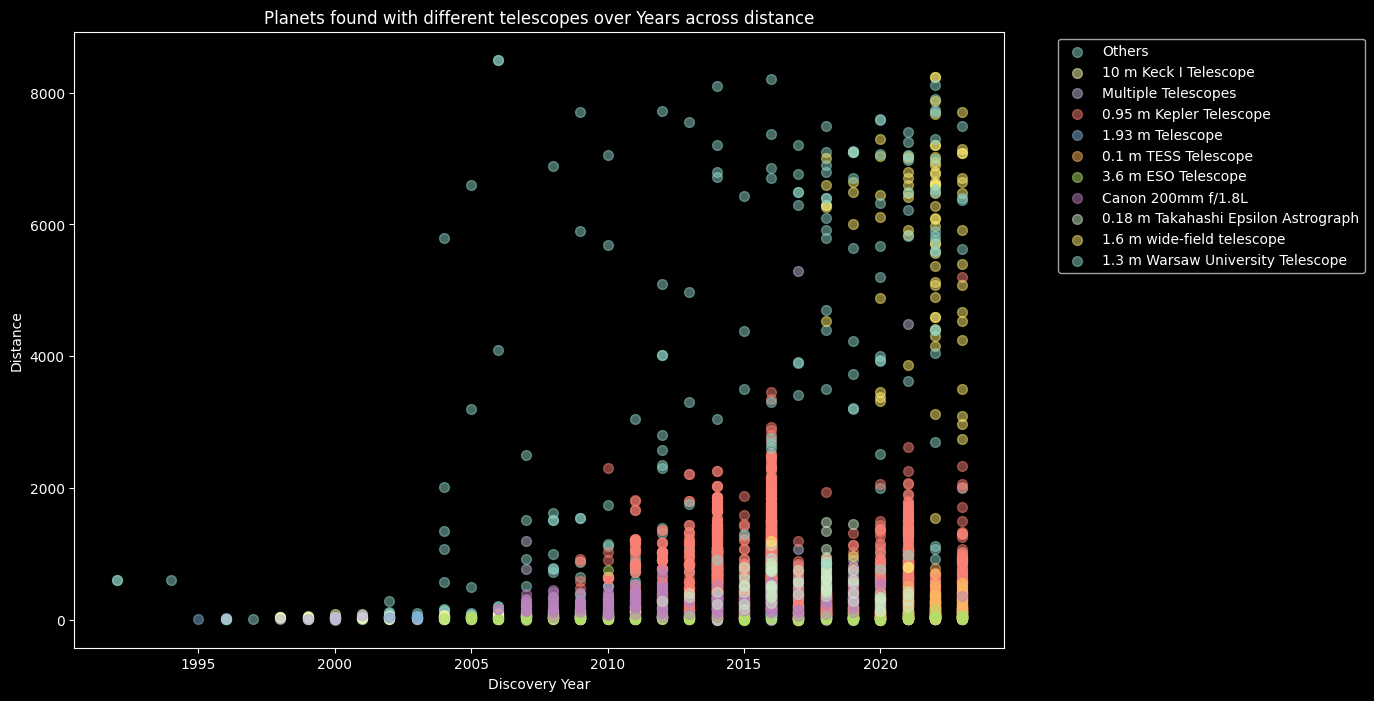

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Count the occurrences of each telescope
telescope_counts = df['disc_telescope'].value_counts()

# Select the top 10 telescopes, and group the rest into 'Others'
top10_telescopes = telescope_counts.head(10).index
df['disc_telescope_top10'] = df['disc_telescope'].apply(lambda x: x if x in top10_telescopes else 'Others')

plt.figure(figsize=(12, 8))

# Iterate over top 10 telescopes and 'Others'
for telescope in df['disc_telescope_top10'].unique():
    subset = df[df['disc_telescope_top10'] == telescope]
    plt.scatter(subset['disc_year'], subset['sy_dist'], label=telescope, s=50, alpha=0.5)

# Labels, title, and legend
plt.xlabel('Discovery Year')
plt.ylabel('Distance')
plt.title('Planets found with different telescopes over Years across distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<Figure size 1400x800 with 0 Axes>

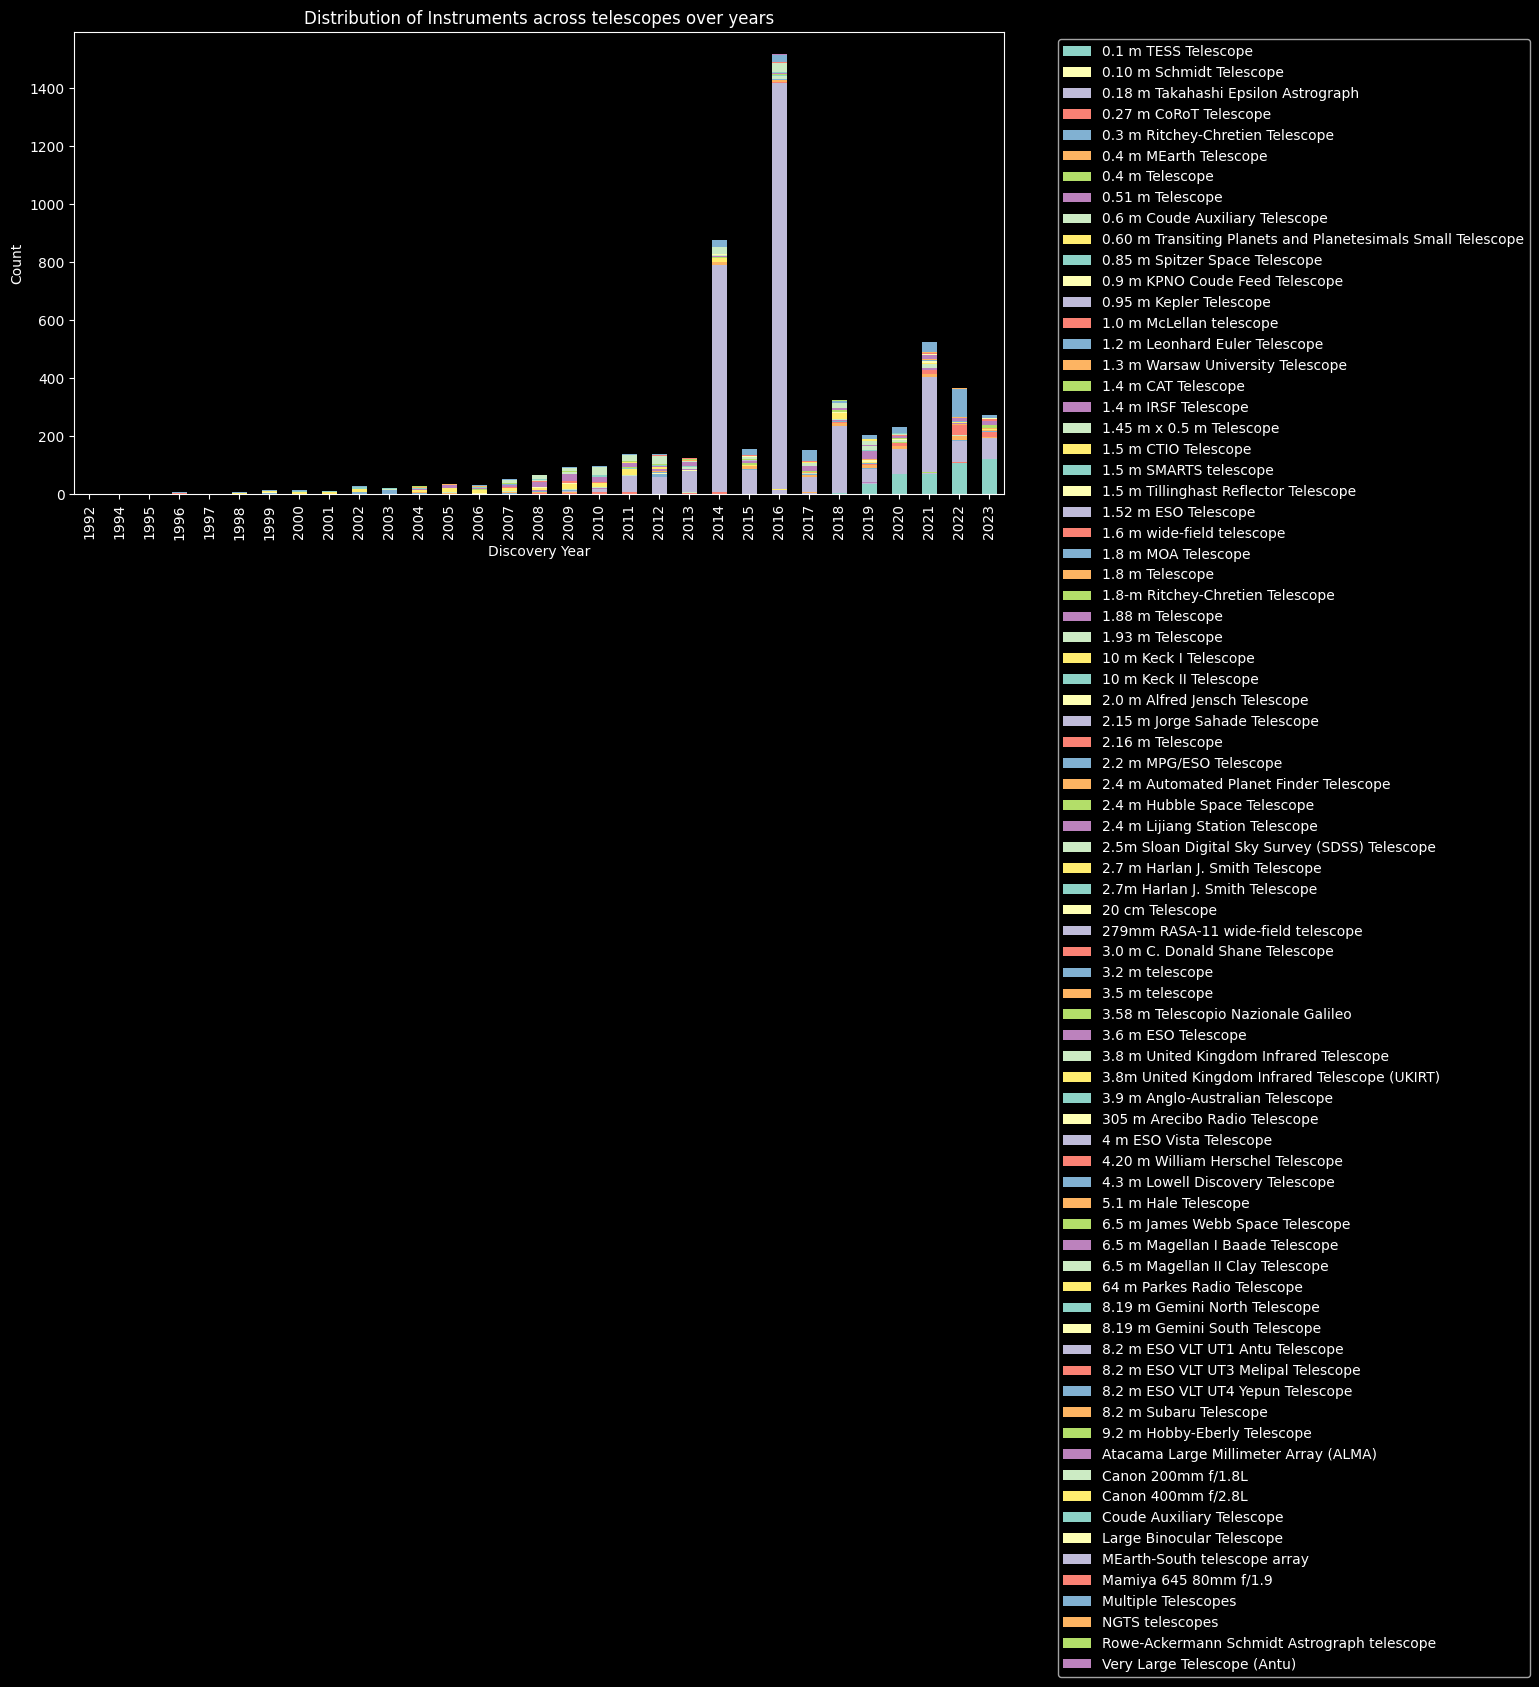

In [12]:
plt.style.use('dark_background')

#Distribution of intruments for each telescope
plt.figure(figsize=(14,8))

#pivot data for stacked bar chart
pivot_df = df.pivot_table(index='disc_year', columns='disc_telescope', values='disc_instrument', aggfunc='count', fill_value=0)

#plotting bars
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

#labels, title and legend
plt.xlabel('Discovery Year')
plt.ylabel('Count')
plt.title('Distribution of Instruments across telescopes over years')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.show()

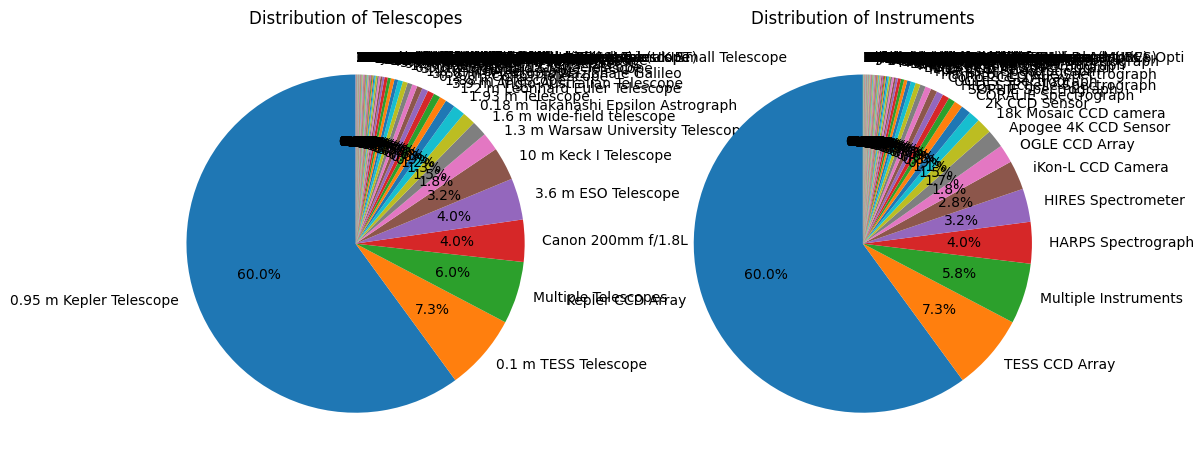

In [ ]:
# Count the occurrences of each telescope and instrument
telescope_counts = df['disc_telescope'].value_counts()
instrument_counts = df['disc_instrument'].value_counts()

# Create a pie chart for telescopes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for telescopes
plt.pie(telescope_counts, labels=telescope_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Telescopes')

# Create a pie chart for instruments
plt.subplot(1, 2, 2)  # Subplot for instruments
plt.pie(instrument_counts, labels=instrument_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Instruments')

plt.show()

<ipython-input-23-8d4e6d23a222>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telescope_counts = top5_telescopes.append(telescope_others)
<ipython-input-23-8d4e6d23a222>:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  instrument_counts = top5_instruments.append(instrument_others)


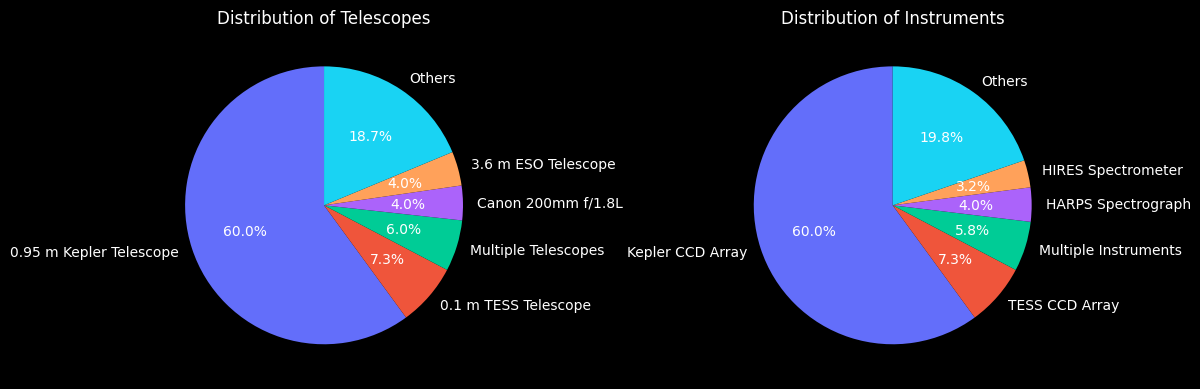

In [23]:
# Count the occurrences of each telescope and instrument
telescope_counts = df['disc_telescope'].value_counts()
instrument_counts = df['disc_instrument'].value_counts()

# Select the top 5 telescopes, and group the rest into 'Others'
top5_telescopes = telescope_counts.head(5)
telescope_others = pd.Series(telescope_counts[5:].sum(), index=['Others'])
telescope_counts = top5_telescopes.append(telescope_others)

# Select the top 5 instruments, and group the rest into 'Others'
top5_instruments = instrument_counts.head(5)
instrument_others = pd.Series(instrument_counts[5:].sum(), index=['Others'])
instrument_counts = top5_instruments.append(instrument_others)

plt.style.use('dark_background')

# Create a pie chart for telescopes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for telescopes
plt.pie(telescope_counts, labels=telescope_counts.index, autopct='%1.1f%%', startangle=90, colors= 
        
plt.title('Distribution of Telescopes')

# Create a pie chart for instruments
plt.subplot(1, 2, 2)  # Subplot for instruments
plt.pie(instrument_counts, labels=instrument_counts.index, autopct='%1.1f%%', startangle=90, colors =['#636EFA',  '#EF553B',  '#00CC96',  '#AB63FA',  '#FFA15A',  '#19D3F3',  '#FF6692',  '#B6E880',  '#FF97FF','#FECB52'])
plt.title('Distribution of Instruments')



# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<ipython-input-15-9a94705eddd2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telescope_data = telescope_data.append({'Telescope': 'Others', 'Count': telescope_counts.sum() - top_telescopes.sum()}, ignore_index=True)


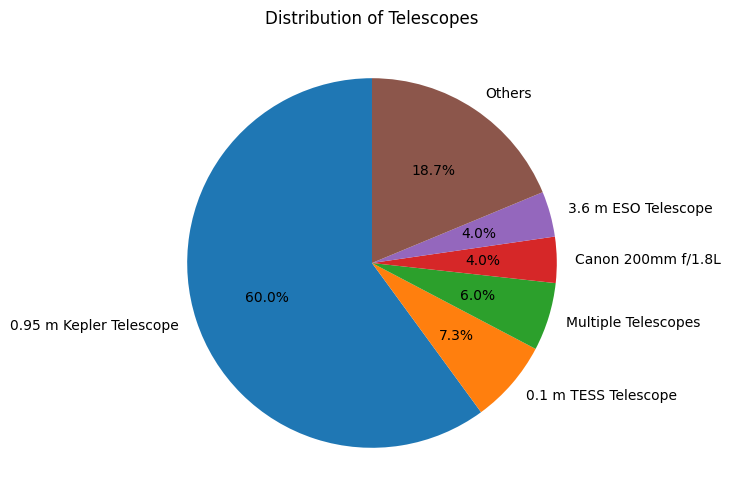

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each telescope
telescope_counts = df['disc_telescope'].value_counts()

# Select the top 5 telescopes
top_telescopes = telescope_counts.head(5)

# Create a new DataFrame with the top 5 telescopes and an "Others" category
telescope_data = pd.DataFrame({'Telescope': top_telescopes.index, 'Count': top_telescopes.values})
telescope_data = telescope_data.append({'Telescope': 'Others', 'Count': telescope_counts.sum() - top_telescopes.sum()}, ignore_index=True)

# Create a pie chart for telescopes
plt.figure(figsize=(12, 6))
plt.pie(telescope_data['Count'], labels=telescope_data['Telescope'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Telescopes')

plt.show()

<ipython-input-16-1523a680edd7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  instrument_data = instrument_data.append({'Instrument': 'Others', 'Count': instrument_counts.sum() - top_instruments.sum()}, ignore_index=True)


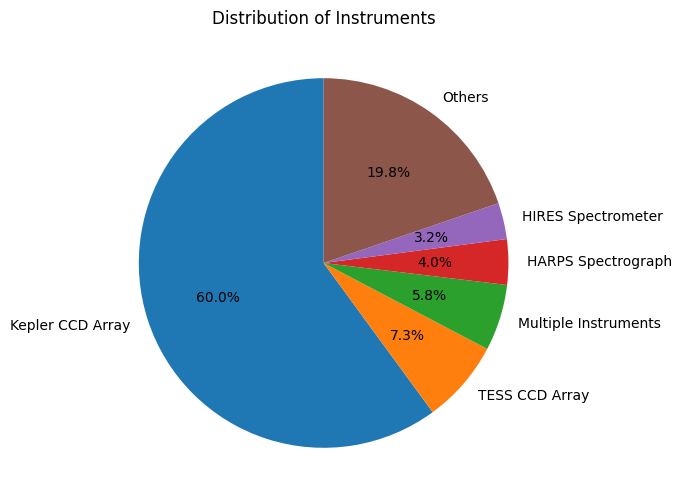

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each instrument
instrument_counts = df['disc_instrument'].value_counts()

# Select the top 5 instruments
top_instruments = instrument_counts.head(5)

# Create a new DataFrame with the top 5 instruments and an "Others" category
instrument_data = pd.DataFrame({'Instrument': top_instruments.index, 'Count': top_instruments.values})
instrument_data = instrument_data.append({'Instrument': 'Others', 'Count': instrument_counts.sum() - top_instruments.sum()}, ignore_index=True)

# Create a pie chart for instruments
plt.figure(figsize=(12, 6))
plt.pie(instrument_data['Count'], labels=instrument_data['Instrument'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Instruments')

plt.show()

In [ ]:
"""Maybe do a piechart with amount of instruments and telescopes?
  How do we want to show planetary systems that are further away?"

In [ ]:
#fig = px.scatter(df_loc, y='',x='disc_year', color=)